In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.model_selection import KFold

In [4]:
# reading data
X_train = pd.read_excel("data/training_data_antiAR.xlsx", index_col = 0, sheet_name="X_t")
X_test = pd.read_excel("data/validation_data_antiAR.xlsx", index_col = 0, sheet_name = "X_v")

y_train = pd.read_excel("data/training_data_antiAR.xlsx", index_col = 0, sheet_name="y_t")
y_test = pd.read_excel("data/validation_data_antiAR.xlsx", index_col = 0, sheet_name = "y_v")

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [15]:
# defining the model
model = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False
)

In [16]:
#fitting the model
model.fit(X_train, y_train)

LinearRegression()

## Cross validation

In [17]:
# leave-many-out

kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_lmo = cross_val_predict(model, X_train, y_train, cv=kf)

ss_res_lmo = np.sum((y_train - y_pred_lmo) ** 2)
ss_tot_lmo = np.sum((y_train - np.mean(y_train)) ** 2)

q2_lmo = 1 - (ss_res_lmo / ss_tot_lmo)
print(f"q2_LMO: {q2_lmo:.2f}")

q2_LMO: 0.88


In [18]:
# leave-one-out

loo = LeaveOneOut()

y_pred_loo = cross_val_predict(model, X_train, y_train, cv=loo)

ss_res_loo = np.sum((y_train - y_pred_loo) ** 2)
ss_tot_loo = np.sum((y_train - np.mean(y_train)) ** 2)

q2_loo = 1 - (ss_res_loo / ss_tot_loo)
print(f"Q² (Leave-One-Out): {q2_loo:.2f}")

Q² (Leave-One-Out): 0.87


## Train set stats

In [19]:
# TRAIN SET PRED
y_pred_train = model.predict(X_train)

# R²
r2_train = r2_score(y_train, y_pred_train)

# RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

print(f"R² train set: {r2_train:.2f}")
print(f"RMSE train set: {rmse:.2f}")

R² train set: 0.90
RMSE train set: 0.38


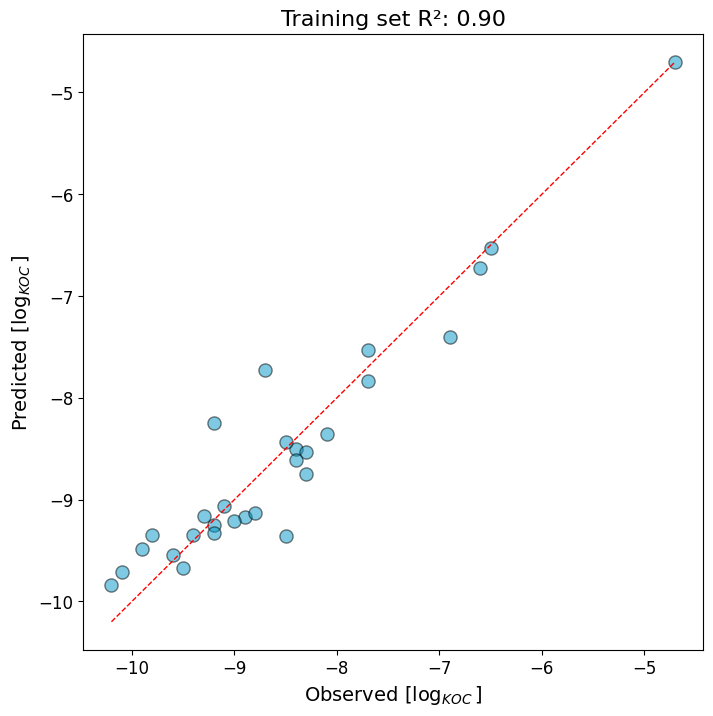

In [20]:
#Training set- pred vs obs values

plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_pred_train, alpha=0.5, s=90, color='#0096c7', edgecolors='black')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=1) 
plt.xlabel(r'Observed [$\log_{KOC}$]', fontsize=14)
plt.ylabel(r'Predicted [$\log_{KOC}$]', fontsize=14)
plt.title(f"Training set R²: {r2_train:.2f}", fontsize=16)
plt.grid(False) #color='lightgray', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

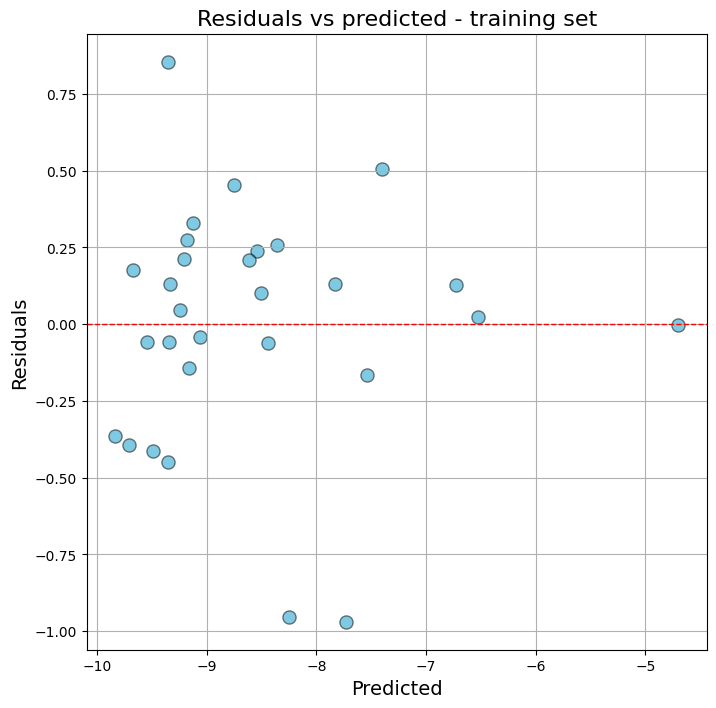

In [21]:
# Training set residuals vs predicted 

# calculate residuals
residuals_train = y_train - y_pred_train

# train set plot residuals vs pred
plt.figure(figsize=(8,8))

plt.scatter(y_pred_train, residuals_train, alpha=0.5, s=90, color='#0096c7', edgecolors='black')
plt.axhline(0, color='r', linestyle='--', lw=1)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)
plt.title('Residuals vs predicted - training set', fontsize=16)
plt.grid(True)

## Test set stats

In [22]:
# Predykcje na zbiorze testowym
y_pred_test = model.predict(X_test)

# Metryki na zbiorze testowym
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"R² validation: {r2_test:.2f}")
print(f"RMSE validation: {rmse_test:.2f}")

R² validation: 0.84
RMSE validation: 0.41


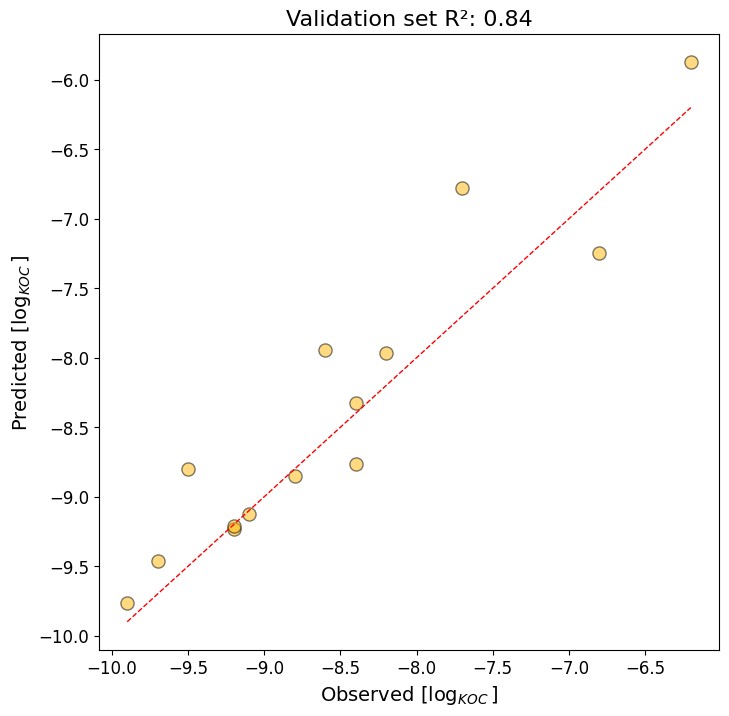

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_test, alpha=0.5, s=90, color='#ffb703', edgecolors='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=1)  # linia y=x
plt.xlabel(r'Observed anti-AR', fontsize=14)
plt.ylabel(r'Predicted ', fontsize=14)
plt.title(f"Validation set R²: {r2_test:.2f}", fontsize=16)
plt.grid(False) #color='lightgray', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

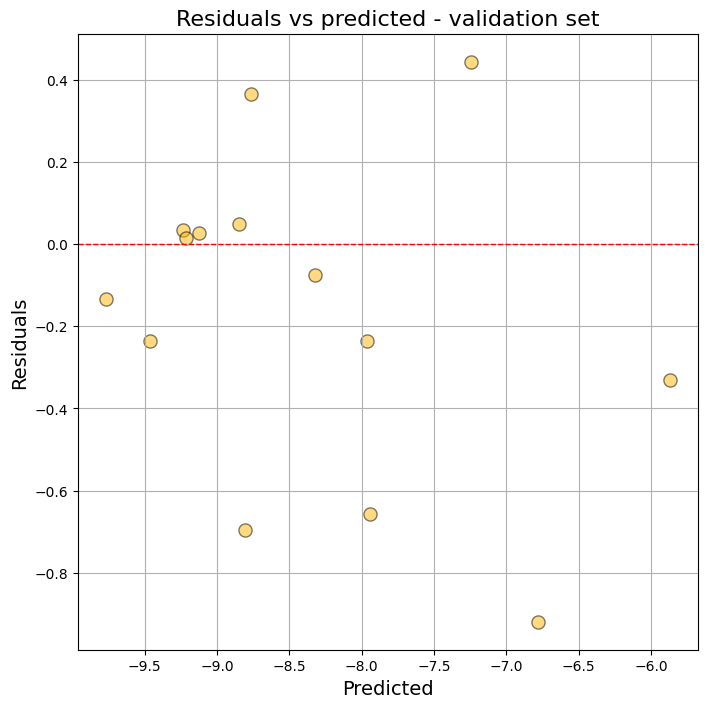

In [24]:
#residuals vs predicted plot
residuals_test = y_test - y_pred_test
 
#test set plot residuals vs predicted 
plt.figure(figsize=(8,8))
plt.scatter(y_pred_test, residuals_test, alpha=0.5, s=90, color='#ffb703', edgecolors='black')
plt.axhline(0, color='r', linestyle='--', lw=1)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)
plt.title('Residuals vs predicted - validation set', fontsize=16)
plt.grid(True)

In [26]:
intercept = model.intercept_
coef_1 = model.coef_[0]
coef_2 = model.coef_[1] 

print(f"Model equation:")
print(f"AntiAR = {intercept:.2f} + {coef_1:.2f} * AMW +{coef_2:.2f}*TPC")

Model equation:
Log Koc observed = 3.60 + -0.21 * AMW +-1.57*TPC


In [ ]:
## ADDITIONAL STATS

In [ ]:
# Q stats
y_train_mean = np.mean(y_train)
y_test_mean = np.mean(y_test)

# Q²F1
Q2_F1 = 1 - np.sum((y_test - y_pred_test)**2) / np.sum((y_test - y_train_mean)**2)

# Q²F2
Q2_F2 = 1 - np.sum((y_test - y_pred_test)**2) / np.sum((y_test - y_test_mean)**2)

# Q²F3
numerator = np.sum((y_test - y_pred_test)**2) / len(y_test)
denominator = np.sum((y_test - y_train_mean)**2) / len(y_train)
Q2_F3 = 1 - numerator / denominator

print("Q²F1 =", Q2_F1)
print("Q²F2 =", Q2_F2)
print("Q²F3 =", Q2_F3)

In [ ]:
def concordance_correlation_coefficient(y_true, y_pred):
    x = y_true
    y = y_pred
    n = len(x)

    mean_x = np.mean(x)
    mean_y = np.mean(y)

    s_xy = np.sum((x - mean_x) * (y - mean_y))
    s_xx = np.sum((x - mean_x) ** 2)
    s_yy = np.sum((y - mean_y) ** 2)
    mean_diff_sq = n * (mean_x - mean_y) ** 2

    ccc = (2 * s_xy) / (s_xx + s_yy + mean_diff_sq)
    return ccc

In [ ]:
ccc_train = concordance_correlation_coefficient(y_train, y_pred_train)
ccc_test = concordance_correlation_coefficient(y_test, y_pred_test)

print(f"Concordance Correlation Coefficient (Train): {ccc_train:.4f}")
print(f"Concordance Correlation Coefficient (Test): {ccc_test:.4f}")

In [ ]:
## APPLICABILITY DOMAIN

In [ ]:
std_res_train = residuals_train / np.std(residuals_train, ddof=1)
std_res_test = residuals_test / np.std(residuals_train, ddof=1)

# === Training ===
X_aug_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
H_train = X_aug_train @ np.linalg.inv(X_aug_train.T @ X_aug_train) @ X_aug_train.T
leverage_train = np.diagonal(H_train)

# === Test ===
# h_i(test) = xᵢᵗ (XᵗX)⁻¹ xᵢ
X_aug_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
hat_matrix_core = np.linalg.inv(X_aug_train.T @ X_aug_train)
leverage_test = np.sum(X_aug_test @ hat_matrix_core * X_aug_test, axis=1)

# === h* threshold ===
n, p = X_aug_train.shape
h_star = 3 * p / n

# === William's Plot ===
plt.figure(figsize=(10, 6))

# training points
plt.scatter(leverage_train, std_res_train, label='Train set', alpha = 0.7, facecolors='#0096c7', edgecolors='k', s=90)

# test points
plt.scatter(leverage_test, std_res_test, label='Test set', alpha = 0.7, facecolors='#ffb703', edgecolors='k', s=90)

plt.axhline(y=3, color='red', linestyle='--', lw = 1)
plt.axhline(y=-3, color='red', linestyle='--', lw = 1)
plt.axvline(x=h_star, color='green', linestyle='--', lw = 1)

plt.xlabel('Leverages', fontsize = 14)
plt.ylabel('Standardized residuals', fontsize = 14)
plt.title("Applicability domain (William's plot)", fontsize = 16)
plt.legend(fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(False) 
plt.tight_layout()
plt.show()

# === Points out of domain ===
outlier_test_idx = np.where(np.abs(std_res_test) > 3)[0]
influential_test_idx = np.where(leverage_test > h_star)[0]

print("Test set - out of domain")
print(f"  Outliers (|resid| > 3): {outlier_test_idx}")
print(f"  Influential (hi > h*): {influential_test_idx}")

In [ ]:
## PICKLE TEST

In [ ]:
# #safe pickle file
# with open('model.pkl', 'wb') as file:
#     pickle.dump(model, file)

In [ ]:
# # 1. Wczytaj model z pliku pickle
# with open('model.pkl', 'rb') as file:
#     model_test = pickle.load(file)

In [ ]:
# train_pred_pickle = model_test.predict(X_train)
# test_pred_pickle = model_test.predict(X_test)

In [ ]:
# df_preds = pd.DataFrame({
#     'pred_test_set': pd.Series(test_pred_pickle),
#     "pred_org_test": y_pred_test
# })

# df_preds.head(10)

In [ ]:
# # Calculate basic metrics
# r2_test_pcl = r2_score(y_test, test_pred_pickle)
# rmse_test_pcl = np.sqrt(mean_squared_error(y_test, test_pred_pickle))

# print(f"R² validation: {r2_test:.2f}")
# print(f"RMSE validation: {rmse_test:.2f}")